# HW 1

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

# Загружаем выборку Diamonds

На данной выборке можно проверять работоспособность своего решения

1. PRICE: price in US dollars (326-18,823)
2. CARAT: weight of the diamond (0.2--5.01)
3. CUT: quality of the cut (Fair, Good, Very Good, Premium, Ideal)
4. COLOR: diamond colour, from J (worst) to D (best)
5. CLARITY: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
6. X: length in mm (0--10.74)
7. Y: width in mm (0--58.9)
8. Z: depth in mm (0--31.8)
9. DEPTH: total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)
10. TABLE: width of top of diamond relative to widest point (43--95)

In [65]:
diamonds_df = pd.read_csv('diamonds.csv')

In [66]:
diamonds_df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


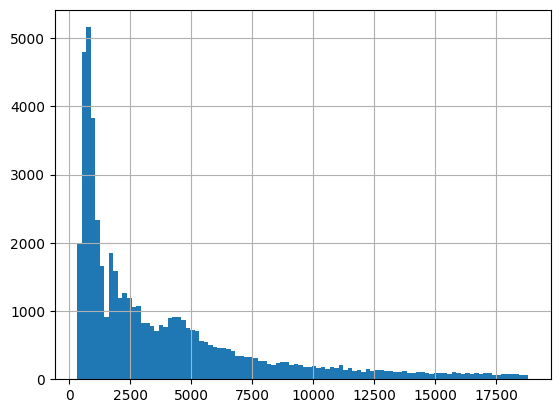

In [67]:
plt.hist(diamonds_df['price'], bins=100)
plt.grid();

# Подготовка данных

In [68]:
features = ['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z']
target = ['price']

In [69]:
cut_transform = {'Fair': 0, 'Good': 1, 'Very Good': 2, 'Premium': 3, 'Ideal': 4}
clarity_transform = {'I1': 0, 'SI2': 1, 'SI1': 2, 'VS2': 3, 'VS1': 4, 'VVS2': 5, 'VVS1': 6, 'IF': 7}
color_transorm = {'D': 0, 'E': 1, 'F': 2, 'G': 3, 'H': 4, 'I': 5, 'J': 6}

In [70]:
diamonds_df['cut'] = diamonds_df['cut'].apply(lambda x: cut_transform.get(x))
diamonds_df['color'] = diamonds_df['color'].apply(lambda x: color_transorm.get(x))
diamonds_df['clarity'] = diamonds_df['clarity'].apply(lambda x: clarity_transform.get(x))

In [71]:
X = diamonds_df[features].copy().values
y = diamonds_df[target].values

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=47, test_size=0.3)

In [73]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Обучаем модель линейной регрессии

In [74]:
reg = LinearRegression().fit(X_train, y_train)

In [75]:
y_pred = reg.predict(X_test)

In [76]:
score = r2_score(y_pred, y_test)

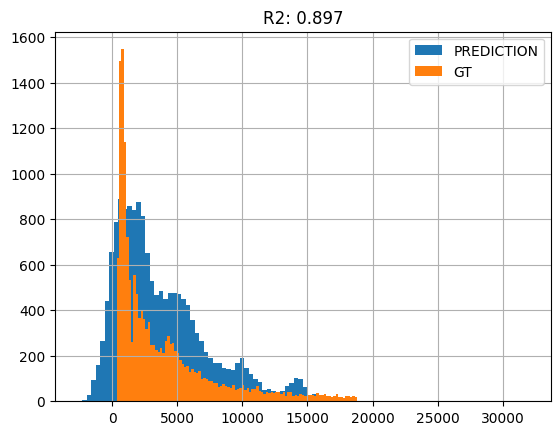

In [77]:
plt.title(f'R2: {str(score)[:5]}')
plt.hist(y_pred.reshape(1, -1)[0], bins=100, label='PREDICTION')
plt.hist(y_test.reshape(1, -1)[0], bins=100, label='GT')
plt.legend()
plt.grid();

# Задание 1: Реализация Gradient Descent для модели линейной регрессии

Ниже представлен шаблон кода, который необходимо дополнить, реализовав все указанные методы, и самостоятельно протестировать корректность решения. Можно (и даже нужно) добавлять свои методы для бОльшей читабельности кода

Достаточно будет, чтобы код работал для случая, когда X и y - np.ndarray

Внутри класса запрещается использовать сторонние библиотеки, кроме numpy

In [78]:
class LinearRegressorGD:
    """
    Линейная регрессия с использованием Gradient Descent
    """

    def __init__(self, learning_rate=0.01, n_iter=1000):
        """
        Конструктор класса

        Параметры:
            learning_rate (float): Скорость обучения
            n_iter (int): Количество итераций градиентного спуска
        """
        self.learning_rate = learning_rate
        self.n_iter = n_iter
        self.w = None
        self.loss_history_ = []

    @staticmethod
    def _add_bias(X):
        """
        Добавляет первый столбец из единиц к матрице X.
        """
        if X.ndim == 1:
            X = X.reshape(-1, 1)
        ones = np.ones((X.shape[0], 1))
        return np.hstack([ones, X])

    def fit(self, X, y):
        """
        Обучение модели на обучающей выборке с использованием
        градиентного спуска

        Параметры:
            X (np.ndarray): Матрица признаков размера (n_samples, n_features)
            y (np.ndarray): Вектор таргета длины n_samples
        """
        X = self._add_bias(X) 
        y = y.reshape(-1, 1)

        n_samples, n_features = X.shape
        self.w = np.zeros((n_features, 1))

        for _ in range(self.n_iter):
            y_pred = X @ self.w
            grad = (2 / n_samples) * (X.T @ (y_pred - y))
            self.w -= self.learning_rate * grad
            self.loss_history_.append(np.mean((y - y_pred) ** 2))

    def predict(self, X):
        """
        Получение предсказаний обученной модели

        Параметры:
            X (np.ndarray): Матрица признаков

        Возвращает:
            np.ndarray: Предсказание для каждого элемента из X
        """
        X = self._add_bias(X)
        return (X @ self.w).ravel()

    def get_params(self):
        """
        Возвращает обученные параметры модели
        """
        return {
            "weights": self.w.flatten(),
            "loss_history": self.loss_history_
        }


In [79]:
lin = LinearRegressorGD()
lin.fit(X_train, y_train)

mse_train = np.mean((y_train.ravel() - lin.predict(X_train))**2)
mse_val   = np.mean((y_test.ravel()  - lin.predict(X_test))**2)

print("LinearRegressorGD MSE train:", mse_train)
print("LinearRegressorGD MSE val  :", mse_val)

LinearRegressorGD MSE train: 8587644.903155483
LinearRegressorGD MSE val  : 8546324.396078685


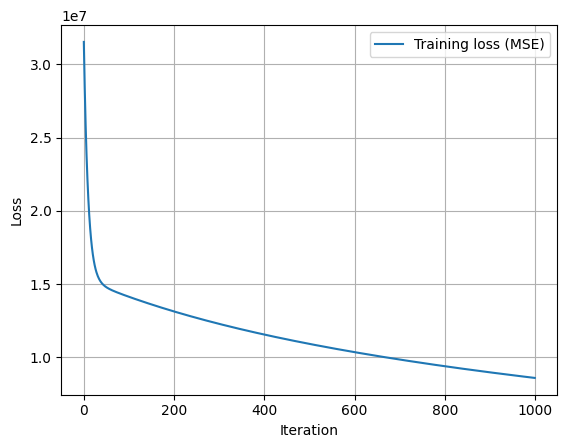

In [80]:
plt.plot(lin.loss_history_, label="Training loss (MSE)")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()
plt.grid()

# Задание 2: Реализация backpropagation для MLP

Ниже представлен шаблон кода, который необходимо дополнить, реализовав все указанные методы, и самостоятельно протестировать корректность решения. Можно (и даже нужно) добавлять свои методы для бОльшей читабельности кода

Достаточно будет, чтобы код работал для случая, когда X и y - np.ndarray

В качестве функции активации на внутренних слоях нужно использовать Sigmoid, а на выходе - линейную активацию f(x) = x

Внутри класса запрещается использовать сторонние библиотеки, кроме numpy

In [81]:
class MLPRegressor:
    """
    Многослойный перцептрон (MLP) для задачи регрессии, использующий алгоритм
    обратного распространения ошибки
    """

    def __init__(self, hidden_layer_sizes=(100,), learning_rate=0.01, n_iter=100):
        """
        Конструктор класса

        Параметры:
            hidden_layer_sizes (tuple): Кортеж, определяющий архитектуру
        скрытых слоев. Например (100, 10) - два скрытых слоя, размером 100 и 10
        нейронов, соответственно
            learning_rate (float): Скорость обучения
            n_iter (int): Количество итераций градиентного спуска
        """
        self.hidden_layer_sizes = hidden_layer_sizes
        self.learning_rate = learning_rate
        self.n_iter = n_iter

        self.weights_ = []
        self.biases_ = []
        self.loss_history_ = []

        self._A = None
        self._Z = None
        
    @staticmethod
    def _sigmoid(z):
        return 1.0 / (1.0 + np.exp(-z))

    @staticmethod
    def _sigmoid_derivative(a):
        return a * (1.0 - a)
        
    def _init_params(self, n_features, n_outputs):
        """Инициализация весов."""
        layer_sizes = (n_features,) + tuple(self.hidden_layer_sizes) + (n_outputs,)
        self.weights_.clear()
        self.biases_.clear()
        rng = np.random.default_rng()
        for fan_in, fan_out in zip(layer_sizes[:-1], layer_sizes[1:]):
            W = rng.uniform(low=-0.5, high=0.5, size=(fan_in, fan_out)) * (1.0 / fan_in)
            b = np.zeros((1, fan_out))
            self.weights_.append(W)
            self.biases_.append(b)
        
    def forward(self, X):
        """
        Реализация forward pass

        Параметры:
            X (np.ndarray): Матрица признаков размера (n_samples, n_features)

        Возвращает:
            np.ndarray: Предсказания модели
        """
        if X.ndim == 1:
            X = X.reshape(-1, 1)
        A = X
        self._A = [A]
        self._Z = []
        L = len(self.weights_)

        for l in range(L):
            Z = A @ self.weights_[l] + self.biases_[l]
            self._Z.append(Z)
            if l < L - 1:
                A = self._sigmoid(Z)
            else:
                A = Z             
            self._A.append(A)

        return A

    def backward(self, X, y):
        """
        Реализация backward pass

        Возвращает:
            X (np.ndarray): Матрица признаков размера (n_samples, n_features)
            y (np.ndarray): Вектор таргета длины n_samples
        """
        if X.ndim == 1:
            X = X.reshape(-1, 1)
        y = y.reshape(-1, 1)

        n = X.shape[0]
        y_pred = self._A[-1]

        dA = (2.0 / n) * (y_pred - y)

        L = len(self.weights_)
        dW_list = [None] * L
        db_list = [None] * L

        for l in reversed(range(L)):
            if l == L - 1:
                dZ = dA
            else:
                A_l = self._A[l + 1]
                dZ = dA * self._sigmoid_derivative(A_l)

            dW = self._A[l].T @ dZ                  
            db = np.sum(dZ, axis=0, keepdims=True)
            dW_list[l] = dW
            db_list[l] = db

            if l > 0:
                dA = dZ @ self.weights_[l].T 

        lr = self.learning_rate
        for l in range(L):
            self.weights_[l] -= lr * dW_list[l]
            self.biases_[l]  -= lr * db_list[l]

        return X, y
        
    def fit(self, X, y):
        """
        Обучение модели

        Параметры:
            X (np.ndarray): Матрица признаков размера (n_samples, n_features)
            y (np.ndarray): Вектор таргета длины n_samples
        """
        if X.ndim == 1:
            X = X.reshape(-1, 1)
        y = y.reshape(-1, 1)

        self._init_params(X.shape[1], y.shape[1])
        
        for _ in range(self.n_iter):
            y_pred = self.forward(X)
            loss = np.mean((y - y_pred) ** 2)
            self.loss_history_.append(loss)
            self.backward(X, y)

    def predict(self, X):
        """
        Получение предсказаний обученной модели

        Параметры:
            X (np.ndarray): Матрица признаков

        Возвращает:
            np.ndarray: Предсказание для каждого элемента из X
        """
        return self.forward(X).ravel()


In [84]:
mlp = MLPRegressor( hidden_layer_sizes=(32, 16), learning_rate=0.005)
mlp.fit(X_train, y_train)

mse_train = np.mean((y_train.ravel() - mlp.predict(X_train))**2)
mse_val   = np.mean((y_test.ravel()  - mlp.predict(X_test))**2)

print("MLPRegressor MSE train:", mse_train)
print("MLPRegressor MSE val  :", mse_val)

MLPRegressor MSE train: 15923426.455132335
MLPRegressor MSE val  : 15897462.586158514


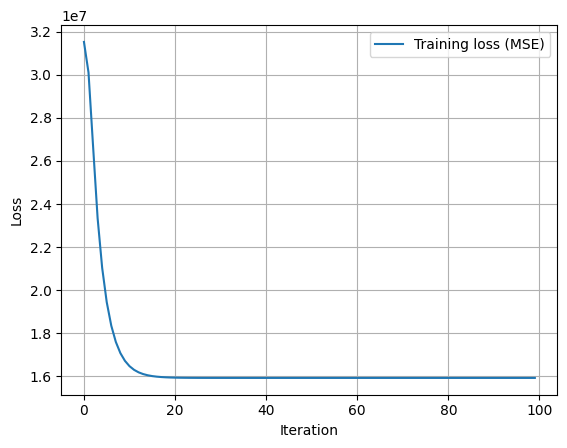

In [87]:
plt.plot(mlp.loss_history_, label="Training loss (MSE)")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()
plt.grid()